#Name - Swaruchi Chitrangad Mhatre



#Project 2–Consumer Complaint Resolution Analysis Using Machine Learning Python

Scenario: Product review is the most basic function/factor in resolving customer issues and increasing the sales growth of any product.We can understand their mindset toward our service without asking each customer. When consumers are unhappy with some aspect of a business, they reach out to customer service and might raise a complaint. Companies try their best to resolve the complaints that they receive. However, it might not always be possible to appease every customer.So Here, we will analyze data, and with the help of different algorithms, we are finding the best classification of customer category so that we can predict our test data.

Objective: Use Python libraries such as Pandas for data operations, Seaborn and Matplotlib for data visualization and EDA tasks, Sklearn for model building and performance visualization, and based on the best model, make a prediction for the test file and save the output.The main objective is to predict whetherour customer is disputed or not with the help of given data.

Dataset description: Customersfaced some issuesand triedto report their problems to customer care

Dispute: This is our target variable based on train data; wehave two groups, one with a dispute with the bank and another don’t have any issue with the bank

Date received: The day complaint was received

Product: different products offered by the bank (credit cards, debit cards, different types of transaction methods, accounts, locker services, and money-related)

Sub-product: loan, insurance, other mortgage options

Issue: Complaint of customers 

Company public response: Company’s response to consumer complaint

Company: Company name

State: State where the customer lives (different state of USA)

ZIP code: Where the customer lives

Submitted via: Register complaints via different platforms (online web, phone, referral, fax, post mail) 

Date sent to company: The day complaint was registered

Timely response?: Yes/no

Consumer disputed?: yes/no (target variable)

Complaint ID: unique to each consumer

In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#Read the Data from the Given excel file

In [5]:
df_train=pd.read_csv("/content/Consumer_Complaints_train.csv")
df_train.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653.0
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613.0
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394.0
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134.0
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613.0


In [6]:
df_test=pd.read_csv("/content/Consumer_Complaints_test.csv")
df_test.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133.0
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989.0
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090.0
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306.0
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667.0


#Check the data type for both data (test file and train file)

In [7]:
print(df_train.shape)
print(df_test.shape)

(25712, 18)
(29077, 17)


In [8]:
df_train.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [9]:
df_test.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25712 entries, 0 to 25711
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received                 25712 non-null  object 
 1   Product                       25712 non-null  object 
 2   Sub-product                   18412 non-null  object 
 3   Issue                         25712 non-null  object 
 4   Sub-issue                     10061 non-null  object 
 5   Consumer complaint narrative  4142 non-null   object 
 6   Company public response       4992 non-null   object 
 7   Company                       25712 non-null  object 
 8   State                         25510 non-null  object 
 9   ZIP code                      25509 non-null  object 
 10  Tags                          3605 non-null   object 
 11  Consumer consent provided?    7453 non-null   object 
 12  Submitted via                 25712 non-null  object 
 13  D

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29077 entries, 0 to 29076
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received                 29077 non-null  object 
 1   Product                       29077 non-null  object 
 2   Sub-product                   20735 non-null  object 
 3   Issue                         29077 non-null  object 
 4   Sub-issue                     11227 non-null  object 
 5   Consumer complaint narrative  4621 non-null   object 
 6   Company public response       5460 non-null   object 
 7   Company                       29076 non-null  object 
 8   State                         28846 non-null  object 
 9   ZIP code                      28846 non-null  object 
 10  Tags                          4175 non-null   object 
 11  Consumer consent provided?    8234 non-null   object 
 12  Submitted via                 29076 non-null  object 
 13  D

In [12]:
df_train.describe()

,Complaint ID
count,2.571100e+04
mean,1.051428e+06
std,5.943527e+05
min,4.100000e+01
25%,5.421315e+05
50%,1.077344e+06
75%,1.569776e+06
max,2.126221e+06


In [13]:
df_test.describe()

,Complaint ID
count,2.907600e+04
mean,1.042888e+06
std,5.914017e+05
min,3.600000e+01
25%,5.367825e+05
50%,1.069893e+06
75%,1.553816e+06
max,2.113946e+06


In [14]:
df_train.dtypes

Date received                    object
Product                          object
Sub-product                      object
Issue                            object
Sub-issue                        object
Consumer complaint narrative     object
Company public response          object
Company                          object
State                            object
ZIP code                         object
Tags                             object
Consumer consent provided?       object
Submitted via                    object
Date sent to company             object
Company response to consumer     object
Timely response?                 object
Consumer disputed?               object
Complaint ID                    float64
dtype: object

In [15]:
df_test.dtypes

Date received                    object
Product                          object
Sub-product                      object
Issue                            object
Sub-issue                        object
Consumer complaint narrative     object
Company public response          object
Company                          object
State                            object
ZIP code                         object
Tags                             object
Consumer consent provided?       object
Submitted via                    object
Date sent to company             object
Company response to consumer     object
Timely response?                 object
Complaint ID                    float64
dtype: object

#Do missing value analysis and drop columns where more than 25% of data are missing

In [16]:
df_train.isnull().sum()

Date received                       0
Product                             0
Sub-product                      7300
Issue                               0
Sub-issue                       15651
Consumer complaint narrative    21570
Company public response         20720
Company                             0
State                             202
ZIP code                          203
Tags                            22107
Consumer consent provided?      18259
Submitted via                       0
Date sent to company                0
Company response to consumer        0
Timely response?                    1
Consumer disputed?                  1
Complaint ID                        1
dtype: int64

In [17]:
df_test.isnull().sum()

Date received                       0
Product                             0
Sub-product                      8342
Issue                               0
Sub-issue                       17850
Consumer complaint narrative    24456
Company public response         23617
Company                             1
State                             231
ZIP code                          231
Tags                            24902
Consumer consent provided?      20843
Submitted via                       1
Date sent to company                1
Company response to consumer        1
Timely response?                    1
Complaint ID                        1
dtype: int64

In [18]:
df_train=df_train.drop(["Sub-product", "Sub-issue", "Consumer complaint narrative", "Company public response", "Tags", "Consumer consent provided?"], axis=1)
df_train.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653.0
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613.0
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394.0
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134.0
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613.0


In [19]:
df_test=df_test.drop(["Sub-product", "Sub-issue","Consumer complaint narrative","Company public response","Tags","Consumer consent provided?"], axis=1)
df_test.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133.0
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989.0
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090.0
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306.0
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667.0


#Extracting Day, Month and Year from Date Received Column and create new fields for a month, year and day

In [20]:
df_train["Date received"] = pd.to_datetime(df_train["Date received"])
df_train["Day"] = df_train["Date received"].dt.day
df_train["Month"] = df_train["Date received"].dt.month
df_train["Year"] = df_train["Date received"].dt.year

In [21]:
df_train.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Day,Month,Year
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653.0,14,10,2015
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613.0,26,4,2015
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394.0,20,12,2013
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134.0,3,3,2016
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613.0,30,1,2015


In [22]:
df_test["Date received"] = pd.to_datetime(df_test["Date received"])
df_test["Day"] = df_test["Date received"].dt.day
df_test["Month"] = df_test["Date received"].dt.month
df_test["Year"] = df_test["Date received"].dt.year

In [23]:
df_test.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Day,Month,Year
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133.0,17,1,2015
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989.0,22,6,2016
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090.0,4,9,2015
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306.0,17,5,2016
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667.0,7,7,2016


#Calculate the Number of Days the Complaint was with the Company and create a new field as “Days held”

In [24]:
df_train["Date received"] = pd.to_datetime(df_train["Date received"])
df_train["Date sent to company"] = pd.to_datetime(df_train["Date sent to company"])

In [25]:
df_train["Days held"] = df_train["Date sent to company"] - df_train["Date received"]
df_train.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Day,Month,Year,Days held
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653.0,14,10,2015,0 days
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613.0,26,4,2015,0 days
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394.0,20,12,2013,14 days
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134.0,3,3,2016,1 days
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613.0,30,1,2015,0 days


In [26]:
df_test["Date received"] = pd.to_datetime(df_test["Date received"])
df_test["Date sent to company"] = pd.to_datetime(df_test["Date sent to company"])

In [27]:
df_test["Days held"] = df_test["Date sent to company"] - df_test["Date received"]
df_test.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Day,Month,Year,Days held
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133.0,17,1,2015,0 days
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989.0,22,6,2016,0 days
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090.0,4,9,2015,0 days
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306.0,17,5,2016,3 days
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667.0,7,7,2016,0 days


#Drop "Date Received", "Date Sent to Company", "ZIP Code", "Complaint ID" fields

In [28]:
df_train=df_train.drop(["Date received", "ZIP code", "Date sent to company", "Complaint ID"], axis=1)
df_train.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Day,Month,Year,Days held
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,14,10,2015,0 days
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,26,4,2015,0 days
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,20,12,2013,14 days
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,3,3,2016,1 days
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,30,1,2015,0 days


In [29]:
df_test=df_test.drop(["Date received", "ZIP code", "Date sent to company", "Complaint ID"], axis=1)
df_test.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Day,Month,Year,Days held
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,17,1,2015,0 days
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,22,6,2016,0 days
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,4,9,2015,0 days
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,17,5,2016,3 days
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,7,7,2016,0 days


#Imputing Null value in “State” by Mode

In [30]:
df_train["State"].mode()
df_train["State"] = df_train["State"].replace(np.nan, "CA")

In [31]:
df_test["State"].mode()
df_test["State"] = df_test["State"].replace(np.nan, "CA")

In [32]:
missing_values_train = pd.DataFrame(df_train.isna().sum(), columns = ['Train'])
missing_values_test = pd.DataFrame(df_test.isna().sum(), columns = ['Test'])
missing_values = pd.concat([missing_values_train, missing_values_test], axis = 1)
missing_values


,Train,Test
Product,0,0.0
Issue,0,0.0
Company,0,1.0
State,0,0.0
Submitted via,0,1.0
Company response to consumer,0,1.0
Timely response?,1,1.0
Consumer disputed?,1,NaN
Day,0,0.0
Month,0,0.0


#with the help of the days we calculated above, create a new field 'Week_Received' where we calculate the week based on the day of receiving

In [33]:
week_train = []
for i in df_train["Day"]:
    if i < 8:
        week_train.append(1)
    elif i >= 8 and i < 16:
        week_train.append(2)
    elif i >=16 and i < 22:
        week_train.append(3)
    else:
        week_train.append(4)
df_train["Week_Received"] = week_train

In [34]:
df_train.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Day,Month,Year,Days held,Week_Received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,14,10,2015,0 days,2
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,26,4,2015,0 days,4
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,20,12,2013,14 days,3
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,3,3,2016,1 days,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,30,1,2015,0 days,4


In [35]:
week_test = []
for i in df_test["Day"]:
    if i < 8:
        week_test.append(1)
    elif i >= 8 and i < 16:
        week_test.append(2)
    elif i >=16 and i < 22:
        week_test.append(3)
    else:
        week_test.append(4)
df_test["Week_Received"] = week_test

In [36]:
df_test.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Day,Month,Year,Days held,Week_Received
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,17,1,2015,0 days,3
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,22,6,2016,0 days,4
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,4,9,2015,0 days,1
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,17,5,2016,3 days,3
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,7,7,2016,0 days,1


#store data of disputed people into the “disputed_cons” variable for future tasks

In [37]:
disputed_cons = df_train[df_train["Consumer disputed?"] == "Yes"]

#Plot bar graph of the total no of disputes of consumers with the help of seaborn

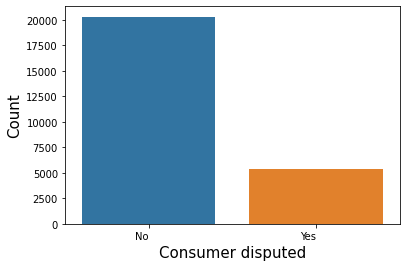

In [38]:
sns.countplot(x = "Consumer disputed?", data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel("Consumer disputed", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

#Plot bar graph of the total no of disputes products-wise with the help of seaborn

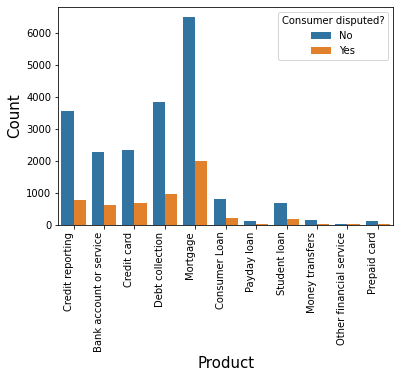

In [39]:
sns.countplot(x = "Product", hue = "Consumer disputed?", data = df_train)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel("Product", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

#Plot bar graph of the total no of disputes with Top Issues by Highest Disputes, with the help of seaborn

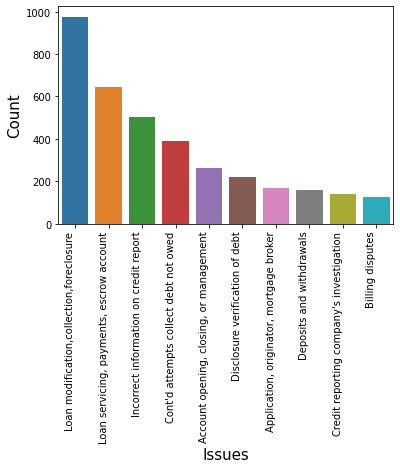

In [40]:
top_issues_disputes = disputed_cons["Issue"].value_counts().sort_values(ascending = False).head(10)
sns.barplot(x = top_issues_disputes.index, y = top_issues_disputes.values)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel("Issues", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

#Plot bar graph of the total no of disputes by State with Maximum Disputes

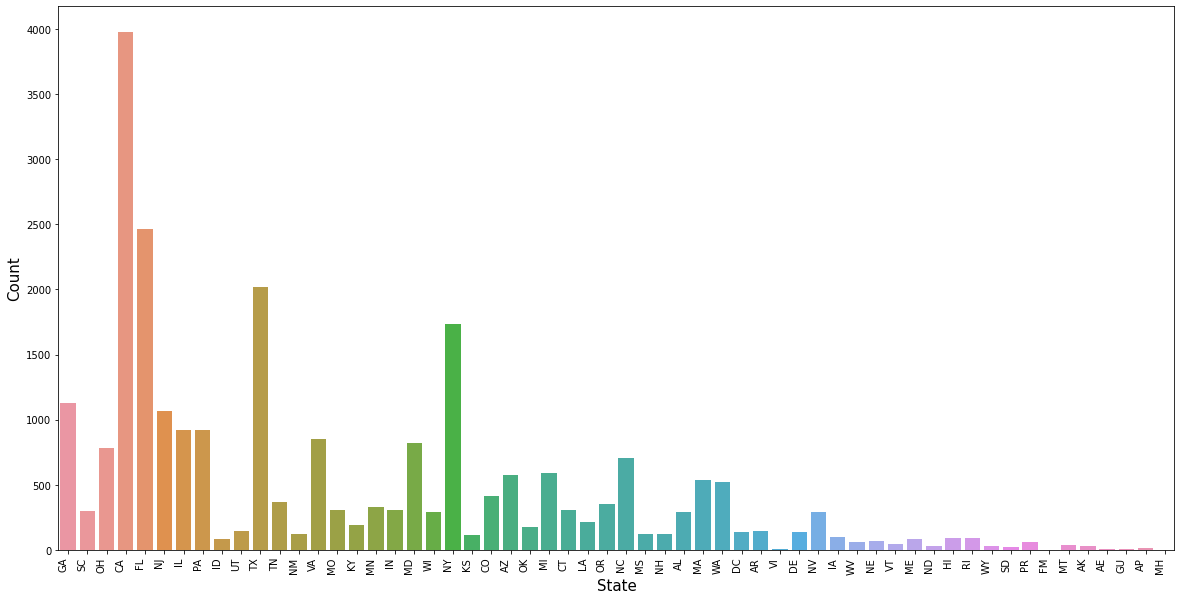

In [41]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x = df_train["State"])
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel("State", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

#Plot bar graph of the total no of disputes Submitted Via different source

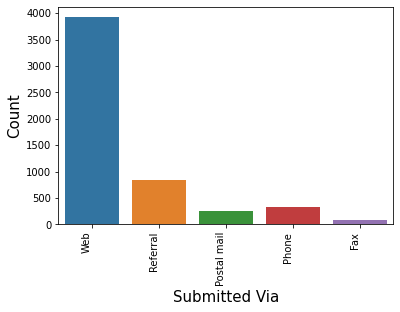

In [42]:
sns.countplot(x = "Submitted via", data = disputed_cons)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel("Submitted Via", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

#Plot bar graph ofthe total no of disputes where the Company's Response to the Complaints

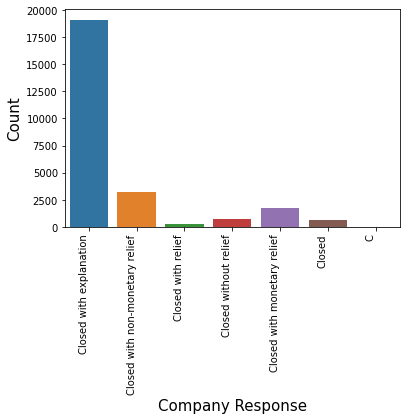

In [43]:
sns.countplot(x = "Company response to consumer", data = df_train)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel("Company Response", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

#Plot bar graph of the total no of disputes where the Company's Response Leads to Disputes

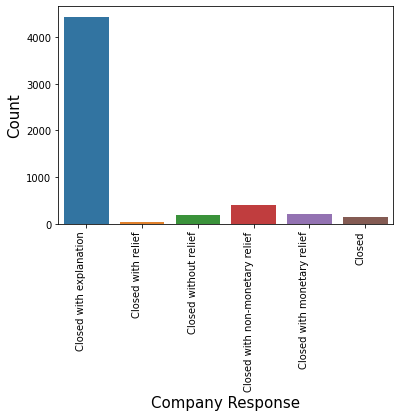

In [44]:
sns.countplot(x = "Company response to consumer", data = disputed_cons)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel("Company Response", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

#Plot bar graph of the total no of disputes. Whether there are Disputes Instead of Timely Response

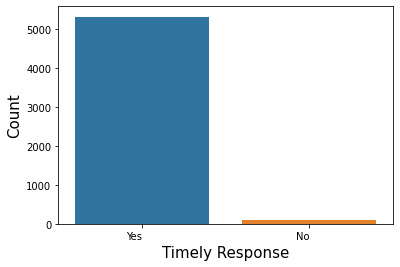

In [45]:
sns.countplot(x = "Timely response?", data = disputed_cons)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel("Timely Response", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

#Plot bar graph of the total no of disputes over Year Wise Complaints

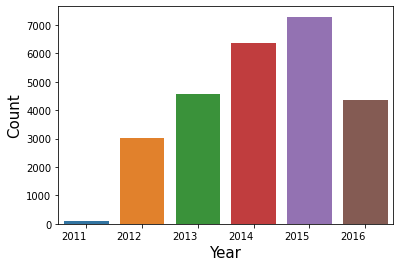

In [46]:
sns.countplot(x = "Year", data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

#Plot bar graph of the total no of disputes over Year Wise Disputes

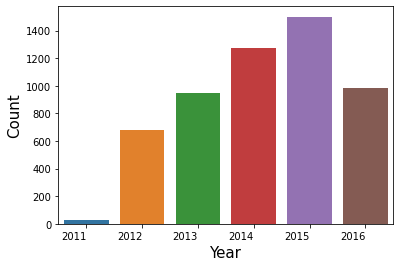

In [47]:
sns.countplot(x = "Year", data = disputed_cons)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

#Plot bar graph of the total no of disputes over Month Wise Complaints

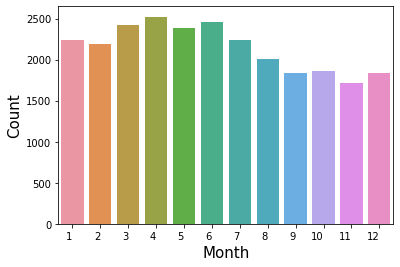

In [48]:
sns.countplot(x = "Month", data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

#Plot bar graph of the total no of disputes over Month Wise Disputes

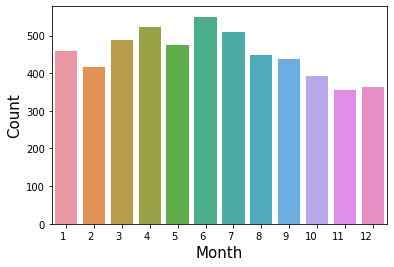

In [49]:
sns.countplot(x = "Month", data = disputed_cons)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

#Plot bar graph of the total no of disputes over Week Wise Complaints

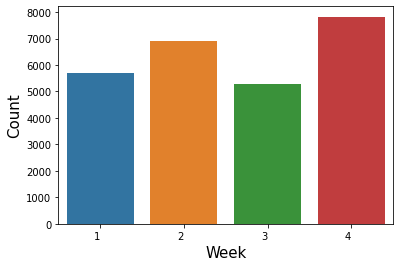

In [50]:
sns.countplot(x = "Week_Received", data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel("Week", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

#Plot bar graph of the total no of disputes over Week Wise Disputes

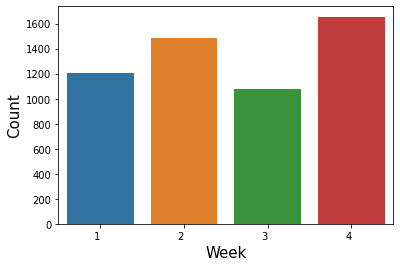

In [51]:
sns.countplot(x = "Week_Received", data = disputed_cons)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel("Week", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

#Plot bar graph of Top Companies with Highest Complaints

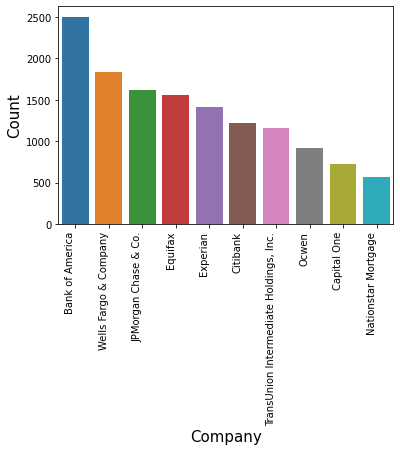

In [52]:
worst_company_complaints = df_train["Company"].value_counts().sort_values(ascending = False).head(10)
sns.barplot(x = worst_company_complaints.index, y = worst_company_complaints.values)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel("Company", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

#Converte all negative days held to zero (it is the time taken by the authority that can't be negative)

In [53]:
df_train["Days held"].describe()

count                         25712
mean      4 days 13:58:53.914125700
std      17 days 02:07:43.108467314
min               -1 days +00:00:00
25%                 0 days 00:00:00
50%                 1 days 00:00:00
75%                 4 days 00:00:00
max               511 days 00:00:00
Name: Days held, dtype: object

In [54]:
df_test["Days held"].describe()

count                         29076
mean      4 days 08:22:35.014444903
std      15 days 20:21:14.628392736
min               -1 days +00:00:00
25%                 0 days 00:00:00
50%                 1 days 00:00:00
75%                 4 days 00:00:00
max               575 days 00:00:00
Name: Days held, dtype: object

In [55]:
df_train["Days held"]

0        0 days
1        0 days
2       14 days
3        1 days
4        0 days
          ...  
25707    0 days
25708    2 days
25709    0 days
25710    1 days
25711    0 days
Name: Days held, Length: 25712, dtype: timedelta64[ns]

In [56]:
df_test["Days held"]

0       0 days
1       0 days
2       0 days
3       3 days
4       0 days
         ...  
29072   4 days
29073   5 days
29074   0 days
29075   4 days
29076      NaT
Name: Days held, Length: 29077, dtype: timedelta64[ns]

In [57]:
df_train["Days held"] = df_train["Days held"].astype(int)

<ipython-input-57-b6d4decce4ce>:1: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df_train["Days held"] = df_train["Days held"].astype(int)


In [58]:
df_test["Days held"] = df_test["Days held"].astype(int)

<ipython-input-58-f26773a5141a>:1: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df_test["Days held"] = df_test["Days held"].astype(int)


In [59]:
Days_held_train = []
for i in df_train["Days held"]:
    if i < 0:
        Days_held_train.append(0)
    else:
        Days_held_train.append(i)
df_train["Days_held"] = Days_held_train

In [60]:
Days_held_test = []
for i in df_test["Days held"]:
    if i < 0:
        Days_held_test.append(0)
    else:
        Days_held_test.append(i)
df_test["Days_held"] = Days_held_test

#Drop Unnecessary Columns for the Model Building like: 'Company', 'State', 'Year_Received', 'Days_held

In [61]:
df_test=df_test.drop(["Company","State","Week_Received","Days held"], axis = 1)
df_test.head()

,Product,Issue,Submitted via,Company response to consumer,Timely response?,Day,Month,Year,Days_held
0,Credit card,Customer service / Customer relations,Web,Closed with monetary relief,Yes,17,1,2015,0
1,Consumer Loan,Payment to acct not credited,Phone,Closed with explanation,Yes,22,6,2016,0
2,Credit card,Credit line increase/decrease,Web,Closed with explanation,Yes,4,9,2015,0
3,Consumer Loan,Problems when you are unable to pay,Web,Closed with non-monetary relief,Yes,17,5,2016,259200000000000
4,Debt collection,Improper contact or sharing of info,Web,Closed with explanation,Yes,7,7,2016,0


In [62]:
df_train=df_train.drop(["Company","State","Week_Received","Days held"], axis = 1)
df_train.head()

,Product,Issue,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Day,Month,Year,Days_held
0,Credit reporting,Incorrect information on credit report,Web,Closed with explanation,Yes,No,14,10,2015,0
1,Bank account or service,Deposits and withdrawals,Web,Closed with explanation,Yes,Yes,26,4,2015,0
2,Credit card,Other,Phone,Closed with non-monetary relief,Yes,No,20,12,2013,1209600000000000
3,Debt collection,Disclosure verification of debt,Referral,Closed with explanation,Yes,No,3,3,2016,86400000000000
4,Debt collection,Disclosure verification of debt,Web,Closed with explanation,Yes,Yes,30,1,2015,0


#Change Consumer Disputed Column to 0 and 1 (yes to 1, and no to 0)

In [63]:
df_train["Consumer disputed?"] = np.where(df_train["Consumer disputed?"] == "Yes", 1, 0)

#Create Dummy Variables for categorical features and concat with the original data frame like: 'Product’, 'Submitted via’, 'Company response to consumer’, 'Timely response?'

In [64]:
dum_cols = ["Product", "Submitted via", "Company response to consumer", "Timely response?"]
df_train_dummies = pd.get_dummies(df_train[dum_cols], prefix_sep = "_", drop_first = True)
df_test_dummies = pd.get_dummies(df_test[dum_cols], prefix_sep = "_", drop_first = True)

In [65]:
df_train = df_train.drop(dum_cols, axis = 1)
df_train = pd.concat([df_train, df_train_dummies], axis = 1)

In [66]:
df_test = df_test.drop(dum_cols, axis = 1)
df_test = pd.concat([df_test, df_test_dummies], axis = 1)

#Scaling the Data Sets (note: discard dependent variable before doing standardization) and Make feature Selection with the help of PCA up to 80% of the information.

In [67]:
df_train_scaled=df_train.drop(["Consumer disputed?","Issue"], axis = 1)
df_train_scaled.head()

,Day,Month,Year,Days_held,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,...,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes
0,14,10,2015,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,26,4,2015,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,20,12,2013,1209600000000000,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,3,3,2016,86400000000000,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4,30,1,2015,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1


In [69]:
df_train_scaled = pd.DataFrame(StandardScaler().fit_transform(df_train_scaled))

In [70]:
df_test_scaled=df_test.drop("Issue", axis = 1)
df_test_scaled.head()

,Day,Month,Year,Days_held,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,...,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes
0,17,1,2015,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,22,6,2016,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,4,9,2015,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,17,5,2016,259200000000000,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4,7,7,2016,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1


In [72]:
df_test_scaled = pd.DataFrame(StandardScaler().fit_transform(df_test_scaled))

In [73]:
pca_columns = []

for i in range(df_train_scaled.shape[1]):
    pca_columns.append("PC" + str(i+1))
pca_model = PCA()
pca_model.fit(df_train_scaled)
df_pca_train = pd.DataFrame(pca_model.transform(df_train_scaled), columns = pca_columns)
explained_info_train = pd.DataFrame(pca_model.explained_variance_ratio_, columns=["Explained Info"]).sort_values(by = "Explained Info", ascending = False)
imp = []

for i in range(explained_info_train.shape[0]):
    imp.append(explained_info_train.head(i).sum())
explained_info_train_sum = pd.DataFrame()
explained_info_train_sum["Variable"] = pca_columns
explained_info_train_sum["Importance"] = imp
explained_info_train_sum.head(60)

,Variable,Importance
0,PC1,Explained Info 0.0 dtype: float64
1,PC2,Explained Info 0.08582 dtype: float64
2,PC3,Explained Info 0.161086 dtype: float64
3,PC4,Explained Info 0.219408 dtype: float64
4,PC5,Explained Info 0.272226 dtype: float64
5,PC6,Explained Info 0.324567 dtype: float64
6,PC7,Explained Info 0.368899 dtype: float64
7,PC8,Explained Info 0.411909 dtype: float64
8,PC9,Explained Info 0.453834 dtype: float64
9,PC10,Explained Info 0.494558 dtype: float64


#Splitting the Data Sets Into X and Y by the dependent and independent variables (data selected by PCA)

In [74]:
pca_columns = []
for i in range(25):
    pca_columns.append("PC" + str(i+1))
pca_model = PCA(n_components = 25)
pca_model.fit(df_train_scaled)
df_pca_train = pd.DataFrame(pca_model.transform(df_train_scaled), columns = pca_columns)

In [75]:
df_pca_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,-1.509496,-0.494620,0.962671,-0.353317,-1.227869,-0.575534,-0.505336,-0.096297,-0.209869,0.166784,...,0.239953,-0.353214,-0.167422,0.325665,0.209992,1.299063,-0.990888,0.494157,-0.136414,0.000355
1,-0.994747,-0.738167,-0.380097,-0.124275,-0.292852,0.512510,0.314698,0.275570,-0.291826,-0.203875,...,-0.338463,0.792245,-0.372585,0.075284,0.272763,0.071885,-0.014224,-0.025693,1.115386,-0.000086
2,1.148581,3.196599,0.288792,2.243574,0.064174,-2.562483,0.834387,-1.246415,-0.973395,-0.779921,...,-0.478383,-0.481937,-0.359800,-0.856410,-1.257241,1.340142,2.310478,0.458580,-0.085208,-0.000914
3,0.299243,-1.070139,0.547552,1.308042,1.619675,1.684195,0.383408,0.952094,-1.177958,0.199928,...,0.080213,-1.467748,1.025704,0.077049,0.536778,-0.619435,-0.248308,0.315260,-0.277894,0.000582
4,-1.686709,-0.847152,-0.533644,0.287125,1.233677,0.603853,0.851701,1.010013,-0.786576,-0.685942,...,-0.826740,0.904756,-0.054141,-0.058927,0.818454,-0.648274,-0.429684,-0.555671,-0.109877,-0.000076


In [76]:
pca_model = PCA(n_components = 25)
pca_model.fit(df_test_scaled)
df_pca_test = pd.DataFrame(pca_model.transform(df_test_scaled), columns = pca_columns)

In [77]:
X = df_pca_train
y = df_train["Consumer disputed?"]

In [78]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 17)
X_test = df_pca_test

In [79]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((17998, 25), (7714, 25), (17998,), (7714,), (29077, 25))

#Build given models and measure their test and validation accuracy:
#Logistic Regression
#Decision Tree Classifier
#Random Forest Classifier
#Ada Boost Classifier
#Gradient Boosting Classifier 
#KNeighbors Classifier
#XGB Classifier

In [80]:
models = [LogisticRegression(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          AdaBoostClassifier(), 
          GradientBoostingClassifier(), 
          KNeighborsClassifier(), 
          XGBClassifier()]

model_names = ["LogisticRegression", 
               "DecisionTreeClassifier", 
               "RandomForestClassifier", 
               "AdaBoostClassifier", 
               "GradientBoostingClassifier", 
               "KNeighborsClassifier", 
               "XGBClassifier"]

accuracy_train = []
accuracy_val = []

for model in models:
    mod = model
    mod.fit(X_train, y_train)

    y_pred_train = mod.predict(X_train)
    y_pred_val = mod.predict(X_val)

    accuracy_train.append(accuracy_score(y_train, y_pred_train))
    accuracy_val.append(accuracy_score(y_val, y_pred_val))

data = {"Modelling Algorithm" : model_names, "Train Accuracy" : accuracy_train, "Validation Accuracy" : accuracy_val}
data = pd.DataFrame(data)
data["Difference"] = ((np.abs(data["Train Accuracy"] - data["Validation Accuracy"])) * 100)/(data["Train Accuracy"])
data.sort_values(by = "Validation Accuracy", ascending = False)

,Modelling Algorithm,Train Accuracy,Validation Accuracy,Difference
6,XGBClassifier,0.788310,0.795048,0.854759
0,LogisticRegression,0.787143,0.794789,0.971320
4,GradientBoostingClassifier,0.791199,0.794789,0.453700
3,AdaBoostClassifier,0.787588,0.793622,0.766198
5,KNeighborsClassifier,0.811979,0.759787,6.427716
2,RandomForestClassifier,0.946994,0.740083,21.849254
1,DecisionTreeClassifier,0.947105,0.691470,26.991212
